In [1]:
# Cell 1 – Imports & load
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
FEATS = pd.read_parquet(Path("../data/parquet/features.parquet"))
print(FEATS.shape, "rows × columns")

(1004534, 14) rows × columns


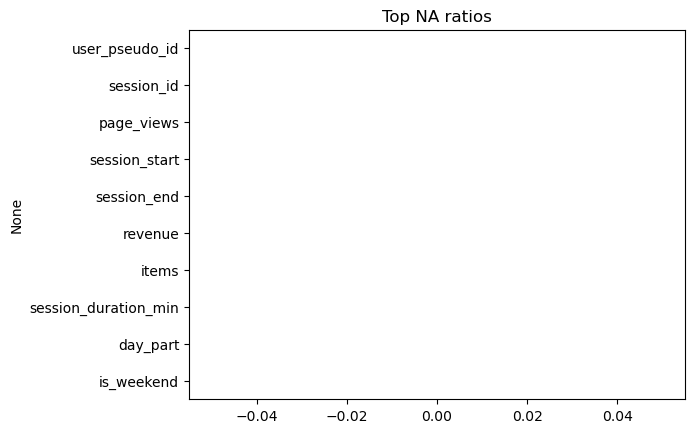

In [2]:
# Cell 2 – Missing-value audit
nulls = FEATS.isna().mean().sort_values(ascending=False).head(10)
sns.barplot(x=nulls.values, y=nulls.index); plt.title("Top NA ratios");


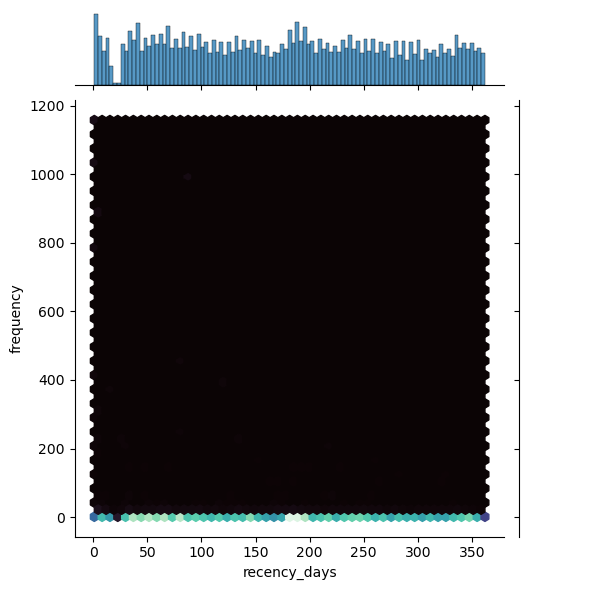

In [3]:
# Cell 3 – Recency-Frequency joint plot
sns.jointplot(data=FEATS, x="recency_days", y="frequency",
              kind="hex", height=6, cmap="mako")


In [7]:
# Cell 4 – RFM scaling for clustering
"""from sklearn.preprocessing import StandardScaler
RFM_scaled = StandardScaler().fit_transform(
    FEATS[["recency_days","frequency","monetary_value"]])"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(FEATS[["recency_days","frequency","monetary_value"]])


recency_days cut-off  : max 365  
scaler               : StandardScaler (mean 0, var 1)
k-range for K-means  : 3-8 (select by silhouette)
